# Palabras Faltantes

En esta notebook, analizamos las palabras que faltaron etiquetar producto del error en el ordenamiento (Personas en vez de PalabrasPersonas)

A su vez, tambien delineamos otro plan de acción:
- Etiquetar las 1K primeras palabras de cada métrica. Medir cuál es la performance de cada una
- Agarrar la/las mejor/es, y etiquetar sólo en base a esa métrica las 5K restantes

Veamos en primer lugar cuántas palabras nos faltaron...

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
entire_df = pd.read_csv("data/listado_definitivo.csv")
entire_df.set_index(' ', inplace=True)
entire_df["Palabra Candidata"] = entire_df["Palabra Candidata"].astype('str')

In [3]:
entire_df.iloc[:10]

,cantPalabra,cantUsuariosTotal,regionTest,provinciaSinEsaPalabra,Palabra Candidata,rankPalabras,rankPalabras_Personas,rankPersonas,FnormMax,FnormMin,...,information_value_palabras,information_value_personas,information_value_personas_palabras,maxDif,normCantPalabras,normCantPersonas,shuffled_entropy_palabras,shuffled_entropy_personas,Unnamed: 25,Unnamed: 26
,,,,,,,,,,,,,,,,,,,,,
logroño,2592,132,['larioja'],20,0,5,8,1,383.290488,0.111428,...,35.431576,34.227821,1.219112,3439.791425,0.342184,0.377771,3.131355,3.107384,NaN,Faltan considerar
breñas,2590,170,['chaco'],17,0,6,6,2,338.811866,0.108242,...,35.087225,32.469701,1.239002,3130.122229,0.342121,0.408690,3.132698,3.096012,NaN,4986
oberá,4322,378,['misiones'],8,0,3,2,3,544.787250,0.100082,...,36.329612,30.713960,1.488857,5443.422132,0.384377,0.506352,3.132531,3.112732,NaN,NaN
chivilcoy,4074,469,['buenosaires'],4,0,4,1,4,444.822212,0.119363,...,35.764721,30.546287,1.535748,3726.627965,0.379500,0.532714,3.132428,3.105334,NaN,NaN
ush,2137,465,['tierradelfuego'],5,0,11,4,5,245.115851,0.110847,...,33.126961,30.497203,1.432260,2211.300145,0.326256,0.531668,3.129223,3.119793,NaN,NaN
chivil,811,241,['buenosaires'],21,0,31,14,6,90.257012,0.118667,...,30.074478,29.707682,1.063571,760.590423,0.246301,0.451343,3.121645,3.101096,NaN,NaN
ipauss,812,83,['tierradelfuego'],22,0,30,39,7,94.868480,94.868480,...,30.134664,29.018148,0.740534,1.000000,0.246403,0.321068,3.117808,3.002291,NaN,NaN
blv,1227,174,['sanluis'],15,0,21,17,8,146.269532,0.106356,...,31.457259,28.842389,0.994651,1375.284506,0.280470,0.411533,3.122525,3.057855,NaN,NaN
sciurano,929,124,['tierradelfuego'],20,0,25,25,9,108.304287,0.147989,...,30.630563,28.582336,0.858400,731.842065,0.257511,0.370130,3.123558,2.992699,NaN,NaN


Agarro las 5000 primeras que son las estudiadas...

In [4]:
df = entire_df.iloc[:5000].copy()

In [5]:
palabras_faltantes = set(range(1, 5001))

indices_faltantes = palabras_faltantes.difference(df.rankPalabras_Personas)

print("Faltan analizar {} palabras".format(len(indices_faltantes)))

Faltan analizar 1222 palabras


(array([  4.,  12.,  21.,  54., 100., 125., 176., 220., 240., 270.]),
 array([ 942. , 1347.6, 1753.2, 2158.8, 2564.4, 2970. , 3375.6, 3781.2,
        4186.8, 4592.4, 4998. ]),
 <a list of 10 Patch objects>)

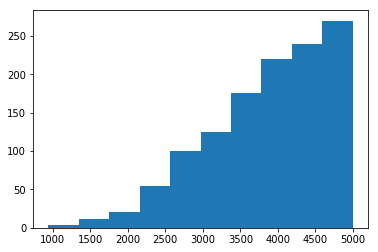

In [6]:
hist(list(indices_faltantes))

In [7]:
print("De las 10K primeras palabras, faltan {}".format(len(indices_faltantes.difference(entire_df.rankPalabras_Personas))))

De las 10K primeras palabras, faltan 185


In [8]:
df.columns

Index(['cantPalabra', 'cantUsuariosTotal', 'regionTest',
       'provinciaSinEsaPalabra', 'Palabra Candidata', 'rankPalabras',
       'rankPalabras_Personas', 'rankPersonas', 'FnormMax', 'FnormMin',
       'provinciaFnormMax', 'provinciaFnormMin', 'entropy_palabras',
       'entropy_personas', 'esLugar', 'fnormArgentina',
       'information_value_palabras', 'information_value_personas',
       'information_value_personas_palabras', 'maxDif', 'normCantPalabras',
       'normCantPersonas', 'shuffled_entropy_palabras',
       'shuffled_entropy_personas', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

## Se descartan palabras por ser "lugar"?

No, hay ejemplos de lugares que fueron marcados como palabras relevantes, como vemos a continuación:

In [9]:
df[(df.esLugar == 'lugar') & (df["Palabra Candidata"] != '0')]

,cantPalabra,cantUsuariosTotal,regionTest,provinciaSinEsaPalabra,Palabra Candidata,rankPalabras,rankPalabras_Personas,rankPersonas,FnormMax,FnormMin,...,information_value_palabras,information_value_personas,information_value_personas_palabras,maxDif,normCantPalabras,normCantPersonas,shuffled_entropy_palabras,shuffled_entropy_personas,Unnamed: 25,Unnamed: 26
,,,,,,,,,,,,,,,,,,,,,
yuto,188,123,"['jujuy', 'salta']",16,1,1207,397,492,17.305753,0.099246,...,15.528916,15.347074,0.193716,174.371590,0.125669,0.369140,3.081650,3.025888,NaN,NaN
concep,248,107,"['entrerios', 'tucuman']",13,1,1216,445,673,17.225007,0.116833,...,15.462245,13.940423,0.178171,147.432590,0.148527,0.352109,3.102151,3.080827,NaN,NaN
correntinos,655,246,"['corrientes', 'chaco']",6,1,449,190,730,60.757523,0.112552,...,19.864220,13.625954,0.320957,539.815098,0.228672,0.453853,3.110636,3.084479,NaN,NaN
tolar,45,12,['salta'],21,1,1289,7778,1204,5.861468,0.120090,...,15.136202,10.802594,0.003528,48.808989,0.007682,0.084713,2.862685,2.253858,NaN,NaN
pingo,4789,1515,"['tucuman', 'santiago', 'salta', 'jujuy', 'cat...",0,1,1627,417,1960,179.032889,0.949336,...,13.765018,7.703421,0.188411,188.587427,0.392844,0.676019,3.132504,3.125851,NaN,NaN
pampa,6931,1494,"['lapampa', 'jujuy', 'chaco', 'mendoza']",0,1,224,232,2110,566.009338,2.747547,...,22.540131,7.305247,0.288756,206.005325,0.423350,0.674313,3.133873,3.132947,NaN,NaN
huinca,74,39,"['lapampa', 'cordoba', 'tierradelfuego']",14,1,3092,2991,2545,4.001637,0.111428,...,9.387001,6.186581,0.016789,35.912180,0.048728,0.228762,3.028963,2.814466,NaN,NaN
pichincha,52,23,"['santafe', 'lapampa']",15,1,2484,5631,2903,4.400650,0.099246,...,10.896438,5.515544,0.005957,44.340646,0.019613,0.164224,2.881680,2.449734,NaN,NaN
totoras,492,207,"['santafe', 'cordoba', 'buenosaires', 'entreri...",0,1,1951,1038,2938,35.318034,0.120090,...,12.623315,5.450559,0.076351,294.096552,0.205058,0.432757,3.113056,3.083087,NaN,NaN


Palabras etiquetadas:

In [10]:
entire_df[entire_df["Palabra Candidata"] != 'nan'].shape

(5014, 26)

## Porcentajes analizados de las palabras que quedan y de las que no

In [11]:
palabras_bien_ordenadas = entire_df[entire_df.rankPalabras_Personas <= 5000]

In [12]:
palabras_ya_analizadas = palabras_bien_ordenadas[palabras_bien_ordenadas["Palabra Candidata"] != 'nan']

no_candidatas = (palabras_ya_analizadas["Palabra Candidata"] != '0').sum()

print("Cantidad de palabras analizadas que 'quedan': {}".format(palabras_ya_analizadas.shape[0]))
porcentaje = no_candidatas / palabras_ya_analizadas.shape[0]
print("Porcentaje de palabras candidatas en las 3800 ya analizadas: {}".format(porcentaje * 100))
print(no_candidatas)

Cantidad de palabras analizadas que 'quedan': 3784
Porcentaje de palabras candidatas en las 3800 ya analizadas: 43.68393234672304
1653


In [13]:
palabras_mal_analizadas = df.iloc[:5000].index.difference(palabras_ya_analizadas.index)[1:]

mal_df = df.loc[palabras_mal_analizadas]
no_candidatas = (mal_df["Palabra Candidata"] != '0').sum()

porcentaje = no_candidatas / mal_df.shape[0]
print("Cantidad de palabras analizadas que 'no quedan': {}".format(mal_df.shape[0]))
print("Porcentaje de palabras candidatas en las palabras que no debieron ser analizadas: {}".format(porcentaje*100))
print(no_candidatas)

Cantidad de palabras analizadas que 'no quedan': 1222
Porcentaje de palabras candidatas en las palabras que no debieron ser analizadas: 47.46317512274959
580


Observamos que el porcentaje de 'candidatas' en las que vamos a tirar es mayor que en las que se quedan...esto puede ser algo producto de la variabilidad del análisis humano, o indica algún otro problema? 

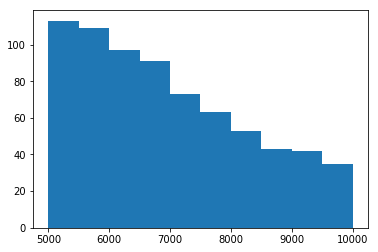

In [14]:
hist(mal_df.rankPalabras_Personas, range=(5000, 10000));

## ¿Qué pasa si usamos rankPalabras?

In [15]:
palabras_df = entire_df[entire_df.rankPalabras <= 5000]

palabras_df.shape

(4039, 26)

In [16]:
palabras_df.columns

Index(['cantPalabra', 'cantUsuariosTotal', 'regionTest',
       'provinciaSinEsaPalabra', 'Palabra Candidata', 'rankPalabras',
       'rankPalabras_Personas', 'rankPersonas', 'FnormMax', 'FnormMin',
       'provinciaFnormMax', 'provinciaFnormMin', 'entropy_palabras',
       'entropy_personas', 'esLugar', 'fnormArgentina',
       'information_value_palabras', 'information_value_personas',
       'information_value_personas_palabras', 'maxDif', 'normCantPalabras',
       'normCantPersonas', 'shuffled_entropy_palabras',
       'shuffled_entropy_personas', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [ ]:
candidatas = palabras_df[u"Palabra Candidata"]

hist(candidatas.as_matrix())

In [ ]:
analizadas = palabras_df[palabras_df["Palabra Candidata"] != 'nan']

analizadas.shape

In [ ]:
candidatas = (analizadas["Palabra Candidata"] != '0').sum()

print("Porcentaje de palabras candidatas: {}".format(100 * candidatas / analizadas.shape[0]))

## Cambio de idea:

¿Y si primero vemos cómo dan las 3 métricas para las primeras, 1000 palabras de cada una?

In [ ]:
from __future__ import division

palabras_faltantes = set(range(1, 1000))

faltantes_palabras = palabras_faltantes.difference(df.rankPalabras)
faltantes_palabraspersonas = palabras_faltantes.difference(df.rankPalabras_Personas)
print("Faltan analizar: {} palabras {} palabras personas".format(
    len(faltantes_palabras),
    len(faltantes_palabraspersonas),
))

In [ ]:
limite = 1000
df_personas = df.iloc[:limite]
df_palabras = df[df.rankPalabras <= limite] 
df_pp = df[df.rankPalabras_Personas <= limite]

In [ ]:
pd.options.display.max_rows = 1500

def info_candidatas(df):
    
    print("="*80)
    num_candidatas = (df["Palabra Candidata"] != '0').sum()
    porcentaje = 100 * num_candidatas / df.shape[0] 
    print("{} palabras - {} candidatas - {:.2f} porcentaje".format(
        df.shape[0], num_candidatas, porcentaje
    ))
    
    palabras_afuera = df[df["Palabra Candidata"] == '0'].index 
    
    print("Palabras que quedaron afuera: {}\n\n ".format(len(palabras_afuera)))
    
    return palabras_afuera
    
    

print("Personas")
pa_personas = info_candidatas(df_personas)
print("Palabras")
pa_palabras = info_candidatas(df_palabras)
print("Palabras Personas")
pa_pp = info_candidatas(df_pp)

palabras_out = {}

for word in df_personas.index: 
    palabras_out[word] = {}
    num = entire_df.loc[word]["Palabra Candidata"].replace(",", ".")
    palabras_out[word]["personas"] = num 


for word in df_palabras.index:
    palabras_out[word] = palabras_out.get(word, {})
    num = entire_df.loc[word]["Palabra Candidata"].replace(",", ".")
    palabras_out[word]["palabras"] = num

for word in df_pp.index:
    palabras_out[word] = palabras_out.get(word, {})
    num = entire_df.loc[word]["Palabra Candidata"].replace(",", ".")
    palabras_out[word]["pp"] = num
    
df_out = pd.DataFrame(palabras_out).T


df_out.fillna("-", inplace=True)

print(df_out.shape)


In [ ]:
df_out[(df_out["palabras"] == '0') &
       (df_out["personas"] == '-') &
       (df_out["pp"] == '-') ]